# Summary:
- ### The average number of Lego sets released per year is 177.
- ### The average number of LEGO parts per year increases generally. 
- ### But From 1950-1996 not crossed the average except for the year 1987.
- ### From 1997-2017 we can see how much the quantity of released sets increased above the average specially years 2012-2016.
- ### The most popular colors used in LEGO parts are: Black, White, Light Bluish Gray, Red, Dark Bluish Gray.
- ### There is 93.74 % transparent brics and 6.26% transparent brics.

# Understanding Lego sets popularity

Now let's now move on to the competition and challenge.

## 📖 Background
You recently applied to work as a data analyst intern at the famous Lego Group in Denmark. As part of the job interview process, you received the following take-home assignment:

You are asked to use the provided dataset to understand the popularity of different Lego sets and themes. The idea is to become familiarized with the data to be ready for an interview with a business stakeholder.

![erd](data/lego_erd.png)

## 💾 The data

#### You received access to a database with the following tables. You can also see above a visualization of how the tables are related to each other. ([source](https://rebrickable.com/downloads)):

#### inventory_parts
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "part_num" - unique id for the part (as in the parts table)
- "color_id" - id of the color
- "quantity" - the number of copies of the part included in the set
- "is_spare" - whether or not it is a spare part

#### parts
- "part_num" - unique id for the part (as in the inventory_parts table)
- "name" - name of the part
- "part_cat_id" - part category id (as in part_catagories table)

#### part_categories
- "id" - part category id (as in parts table)
- "name" - name of the category the part belongs to

#### colors
- "id" - id of the color (as in inventory_parts table)
- "name" - color name
- "rgb" - rgb code of the color
- "is_trans" - whether or not the part is transparent/translucent

#### inventories
- "id" - id of the inventory the part is in (as in the inventory_sets and inventory_parts tables)
- "version" - version number
- "set_num" - set number (as in sets table)

#### inventory_sets
- "inventory_id" - id of the inventory the part is in (as in the inventories table)
- "set_num" - set number (as in sets table)
- "quantity" - the quantity of sets included

#### sets
- "set_num" - unique set id (as in inventory_sets and inventories tables)
- "name" - the name of the set
- "year" - the year the set was published
- "theme_id" - the id of the theme the set belongs to (as in themes table)
- num-parts - the number of parts in the set

#### themes
- "id" - the id of the theme (as in the sets table)
- "name" - the name of the theme
- "parent_id" - the id of the larger theme, if there is one


***Acknowledgments**: Rebrickable.com*

## 💪 Challenge
Create a report to summarize your findings. Include:

1. What is the average number of Lego sets released per year?
2. What is the average number of Lego parts per year?
3. Create a visualization for item 2.
4. What are the 5 most popular colors used in Lego parts?
5. [Optional] What proportion of Lego parts are transparent?
6. [Optional] What are the 5 rarest lego bricks?
7. Summarize your findings.

## ⌛️ Time is ticking. Good luck!

In [26]:
#Importing python libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

# What is the average number of Lego sets released per year?
## We will do it in two steps:
- Counts the number of sets for each distinct year
- Calculates the average of the "num_of_sets" column from the temporary table generated by the inner subquery

In [27]:
SELECT year, COUNT(set_num) AS num_of_sets
FROM sets
GROUP BY year
ORDER BY year ASC

,year,num_of_sets
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12
...,...,...
61,2013,593
62,2014,713
63,2015,665
64,2016,596


In [28]:
SELECT ROUND(AVG(num_of_sets))
FROM 
(
    SELECT COUNT(set_num) AS num_of_sets
    FROM sets
    GROUP BY year
) AS number_per_year;

,round
0,177


## So the average number of Lego sets released per year 177 per Year
## We can visualize it:

- ### The average number of LEGO parts per year increases generally.
- ### From 1950-1996 not crossed the average except for the year 1987
- ### From 1997-2017 we can see how much the quantity of released sets increased above the average specially years 2012-2016

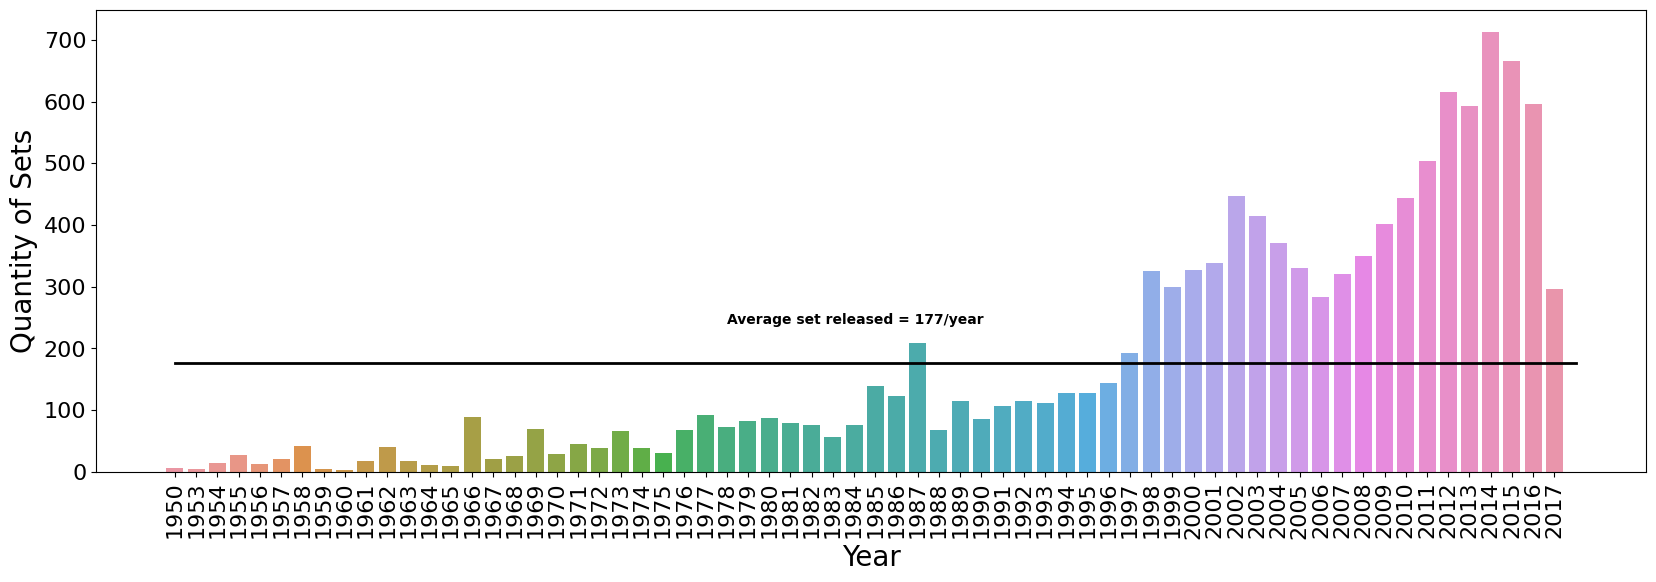

In [29]:
figure(figsize = (20, 6), dpi = 100)
ax = sns.barplot(data = df2, x = 'year', y = 'num_of_sets')
plt.xticks(rotation=90)
ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Quantity of Sets',fontsize = 20)
plt.plot([0, (2017-1951)], [177, 177], color='k', linestyle='-', linewidth=2)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.text(26, 240, "Average set released = 177/year", horizontalalignment='left', size='medium', color='black', weight='bold')
plt.show()

# **What is the average number of Lego parts per year?**

In [30]:
SELECT 
	year, 
	ROUND(AVG(num_parts), 1) as average_num_parts
FROM sets
GROUP BY year
ORDER BY year ASC

,year,average_num_parts
0,1950,10.1
1,1953,16.5
2,1954,12.4
3,1955,36.9
4,1956,18.5
...,...,...
61,2013,181.3
62,2014,169.7
63,2015,201.7
64,2016,253.1


## Create a visualization for item 2.

In [42]:
import plotly.express as px

# Create the initial line plot
fig = px.line(df3, x='year', y='average_num_parts', 
              color_discrete_sequence=['blue'],
              line_shape='spline',
              labels={'year':'Year', 'average_num_parts':'Average Parts'},
             )

# Show the combined plot
fig.show()

# Number of sets and avg parts released per year increased by the end of 90's

# What are the 5 most popular colors used in Lego parts?

In [32]:
SELECT *
FROM public.inventory_parts
LIMIT 2

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,False
1,1,48395,7,1,False


In [33]:
WITH colors_per_parts AS 
(
	SELECT inventory_parts.part_num,
			inventory_parts.color_id,
			colors.name AS color,
			inventory_parts.quantity
	FROM inventory_parts
	JOIN colors 
	ON inventory_parts.color_id=colors.id
)

SELECT 
	color,
	SUM(quantity) AS quantity
FROM colors_per_parts
GROUP BY color 
ORDER BY quantity DESC
LIMIT 5;

,color,quantity
0,Black,396416
1,White,221553
2,Light Bluish Gray,201858
3,Red,169983
4,Dark Bluish Gray,148584


# The most popular colors are:
### - BLACK
### - WHITE
### - LIGHT Bluish Gray
### - RED
### - DARK Bluish Gray

#  What proportion of Lego parts are transparent?

In [40]:
WITH colors_per_parts AS 
(
	SELECT         
            CASE WHEN is_trans = 'False' THEN 'False'ELSE 'True' END AS is_trans, 
			COUNT(colors.is_trans) as Count_,
	    ROUND (
        COUNT(colors.is_trans) *100.0 / (SELECT COUNT(*) 
                                from inventory_parts),2
        ) as percent_of_parts
	FROM inventory_parts
	JOIN colors 
	ON inventory_parts.color_id=colors.id
	GROUP BY is_trans
)
SELECT * FROM colors_per_parts;

,is_trans,count_,percent_of_parts
0,False,543751,93.74
1,True,36318,6.26


- ## Only small portion did transparent 6.26 %
- ## While 93.74 % did not transparent

# What are the 5 rarest lego bricks?

In [41]:
SELECT p.name,count(*) as sum
FROM inventory_parts as ip
JOIN parts as p
    ON ip.part_num = p.part_num
GROUP BY p.name
ORDER BY sum

,name,sum
0,"Minifig Head with Dark Red Lips, Smirk/Eyemask...",1
1,Torso Plain / Dark Gray Arms / Sand Green Hands,1
2,DUPLO BALLOON,1
3,"Torso Batman Muscles Outline, Medallion and Bl...",1
4,"Minifig Head Female with Red Lips, Open Mouth ...",1
...,...,...
22937,Plate 2 x 2,7052
22938,Plate 2 x 4,7859
22939,Brick 1 x 2,8634
22940,Plate 1 x 2,10359
